# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import pylab
import matplotlib.pyplot as plt

In [15]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [16]:
# number of callbacks for black-sounding names
print(sum(data[data.race=='w'].call))
print(sum(data[data.race=='b'].call))
print(len(data.race))

235.0
157.0
4870


In [46]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

1) Since the randomly selected sample size of this dataset is sufficiently large (4870 resumes, 392 callbacks), the Central Limit Theorem would apply and use of the z-statistic to determine significance would be most appropriate.

2) Null Hypothesis (Ho) = Black-sounding names do not affect interview request rates
   Alternative Hypothesis (Ha) = Black-sounding names impact interview request rates

In [65]:
#Partition interview requests dataframes by race. Each dataframe is of equal size (2,435 resumes each) 
w = data[data.race=='w']
b = data[data.race=='b']

#Compute/Print Probability of callback, mean, and standard deviation for each df

#Callback count out of 2,435 resumes for each df
mu_call_w = len(w[w['call'] == 1]) / len(w)
mu_call_b = len(b[b['call'] == 1]) / len(b)
mu_wb_diff = mu_call_w - mu_call_b

#Standard deviation of each df
std_w = (mu_call_w * (1-mu_call_w)) / len(w) 
std_b = (mu_call_b * (1-mu_call_b)) / len(b)
std_wb_diff = np.sqrt([std_w + std_b]) 

#Compute relevant statistics (Margin of error @ 95% confidence, confidence interval, and p-value)
z_score = mu_wb_diff / std_wb_diff #Standard deviations from 0 difference
p_value = (1-stats.norm.cdf(z_score)) * 2 

z_critical = stats.norm.ppf(q=0.975)
moe = z_critical * std_wb_diff 
conf_int = mu_wb_diff + np.array([-1,1]) * moe

#Compare each statistic
print('Interview requested --> White(samp_p): %.3f vs. Black (samp_p): %.3f Difference: %.3f' % (mu_call_w,mu_call_b, mu_wb_diff) + '\n'
      'Standard deviation (White - Black): %.4f' % (std_wb_diff) + '\n')

alpha = 0.05
if p_value > alpha:
    print('z-score = %.2f p_value= %.2f' % (z_score, p_value), ':Do not reject the null hypothesis')
else:
    print('z-score = %.2f p_value= %.2f' % (z_score, p_value), ':Reject the null hypothesis')

Interview requested --> White(samp_p): 0.097 vs. Black (samp_p): 0.064 Difference: 0.032
Standard deviation (White - Black): 0.0078

z-score = 4.12 p_value= 0.00 :Reject the null hypothesis


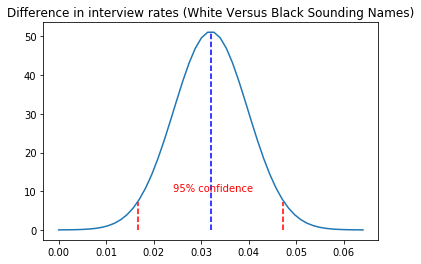

In [43]:
#Create visualization of differences in interview rates for black versus white sounding names on resumes
x_max = mu_wb_diff + (std_wb_diff * z_score)         
x_min = mu_wb_diff - (std_wb_diff * z_score)
x = np.linspace(x_min, x_max)
y = norm.pdf(x, loc=mu_wb_diff, scale=std_wb_diff)    # for example
pylab.plot(x,y)
plt.title('Difference in interview rates (White Versus Black Sounding Names)')
plt.vlines(mu_wb_diff, ymin=0, ymax=51, color='blue', linestyles='dashed')
plt.vlines(conf_int[0], ymin=0, ymax=7.2, color='red', linestyles='dashed')
plt.vlines(conf_int[1], ymin=0, ymax=7.2, color='red', linestyles='dashed')
plt.text(mu_wb_diff * 0.75, 10, '95% confidence', color='red')
pylab.show()

In [62]:
#Repeat above excercise, but implement bootstrapping (random sampling + replacement) to see if results still hold
data_replication = np.empty(10000)

white = data[data.race=='w']['call'].values
black = data[data.race=='b']['call'].values

mu_diff_resample = np.mean(white) - np.mean(black)

for i in range(len(data_replication)):
    data_samples = np.random.permutation(np.concatenate((white, black)))

    white_sample = data_samples[:len(white)]
    black_sample = data_samples[len(white):]

    data_replication[i] = np.abs(np.mean(white_sample) - np.mean(black_sample))

p = np.sum(data_replication > mu_diff_resample) / len(data_replication)
print('p =', p)

p = 0.0001


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

<b>Explanation of results</b>

After carefully examining the dataset, it's reasonable to conclude that there is a significant difference in interview requests when comparing black versus white sounding names on resumes. The mean difference in call rates was 3.2%, which is over four standard deviations away from no difference (i.e. 0%). Testing was done at a 95% confidence rate, which would be approxuimately two standard deviations away from the mean difference, so it was clear that our initial z-score was what we needed to know. We can reject the null hypothesis and accept the alternative hypothesis that black-sounding names impact interview request rates.

Despite the clear signal, questions remain - such as what other factors could have influenced the dataset? The dataset contained 65 other columns of detailed data describing a range of factors from employment gaps to military experience. It would be important to fully understand other potential bias in the data and see whether there was an underlying commonality not captured in the the direct analysis we did. Assuming no bias occurred amongst other factors, the results from our above tests were clearly pointing to a rejection of the null hypothesis. 